<a href="https://colab.research.google.com/github/lnmtam1999/BigData/blob/main/Amazon_Craw_Bertl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4 --upgrade

     |████████████████████████████████| 97 kB 4.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install wordcloud

In [ ]:
!pip install TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from google.colab import files
import time

import os
import re 
import spacy
import string


from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [ ]:
HEADERS = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

In [ ]:
reviewlist = []

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=HEADERS)
    # r = requests.get('http://localhost:8050/render.html', params={'url': url, 'wait': 2})
    # r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
def get_reviews1(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating': item.find('i', {'data-hook': 'review-star-rating'}).text.strip(),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in range(1,365):
    soup = get_soup(f'https://www.amazon.com/Nintendo-Switch-Lite-Blue/product-reviews/B092VT1JGD/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}') 
    print(f'Getting page: {x}')
    get_reviews1(soup)
    print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

Getting page: 1
3648
Getting page: 2
3658
Getting page: 3
3668
Getting page: 4
3678
Getting page: 5
3688
Getting page: 6
3698
Getting page: 7
3708
Getting page: 8
3718
Getting page: 9
3728
Getting page: 10
3738
Getting page: 11
3748
Getting page: 12
3758
Getting page: 13
3768
Getting page: 14
3778
Getting page: 15
3788
Getting page: 16
3798
Getting page: 17
3808
Getting page: 18
3818
Getting page: 19
3828
Getting page: 20
3838
Getting page: 21
3848
Getting page: 22
3858
Getting page: 23
3868
Getting page: 24
3878
Getting page: 25
3888
Getting page: 26
3898
Getting page: 27
3908
Getting page: 28
3918
Getting page: 29
3928
Getting page: 30
3938
Getting page: 31
3948
Getting page: 32
3958
Getting page: 33
3968
Getting page: 34
3978
Getting page: 35
3988
Getting page: 36
3998
Getting page: 37
4008
Getting page: 38
4018
Getting page: 39
4028
Getting page: 40
4038
Getting page: 41
4048
Getting page: 42
4058
Getting page: 43
4068
Getting page: 44
4078
Getting page: 45
4088
Getting page: 46
40

In [ ]:
df = pd.DataFrame(reviewlist)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276 entries, 0 to 7275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7276 non-null   object
 1   rating  7276 non-null   object
 2   body    7276 non-null   object
dtypes: object(3)
memory usage: 170.7+ KB


In [ ]:
# df.to_csv(f'nintendo_switch_review_amazon.csv') 
# files.download(f'nintendo_switch_review_amazon.csv')

In [ ]:
print("Rating with 0 star: " + str(len(df[df['rating'] == '1.0 out of 5 stars'])))
print("Rating with 1 star: " + str(len(df[df['rating'] == '2.0 out of 5 stars'])))
print("Rating with 2 star: " + str(len(df[df['rating'] == '3.0 out of 5 stars'])))
print("Rating with 3 star: " + str(len(df[df['rating'] == '4.0 out of 5 stars'])))
print("Rating with 4 star: " + str(len(df[df['rating'] == '5.0 out of 5 stars'])))

Rating with 0 star: 710
Rating with 1 star: 180
Rating with 2 star: 276
Rating with 3 star: 498
Rating with 4 star: 5612


In [ ]:
def clean_text(text):
  text = re.sub(r'@[A-Za-z0-9]',r'',text.lower())     
  text = re.sub(r'http.*',r'', text.lower())
  return ' '.join(re.findall(r'\w+', text.lower()))

df['body'] = df['body'].apply(lambda x: clean_text(x))
df['body']

0       gave it 5 stars because there is nothing wrong...
1       i strongly recommend against buying the switch...
2       basically a budget friendly nintendo switch th...
3       for those who use will use the switch exclusiv...
4       do not buy this as a second switch especially ...
                              ...                        
7271    awesome love it i m a woman and this is the pe...
7272    i wanted something to take to work with me to ...
7273                          shipped and arrived quickly
7274    yuh this thing is cool yerrr errrbody wanna th...
7275                                       like the color
Name: body, Length: 7276, dtype: object

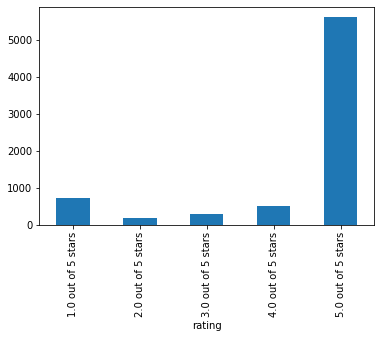

In [ ]:
df.groupby("rating").rating.count().plot.bar(ylim=0)

710


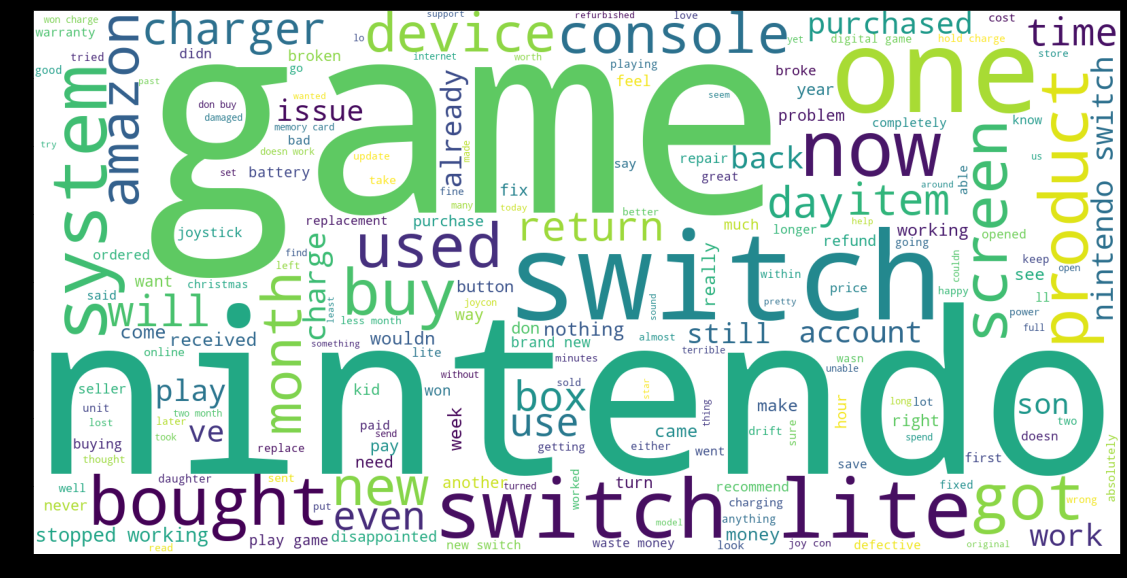

In [ ]:
Negative = df[df['rating'] == ('1.0 out of 5 stars' or '2.0 out of 5 stars'or '3.0 out of 5 stars')]
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(Negative.body))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)
print(len(Negative))

498


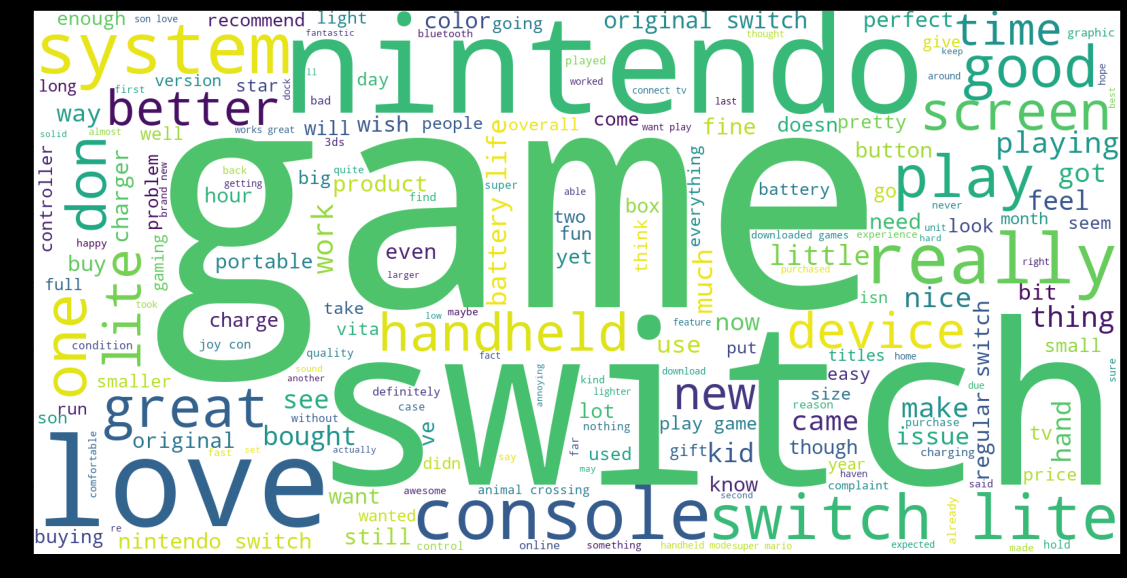

In [ ]:
Positive = df[df['rating'] == ('4.0 out of 5 stars' or '5.0 out of 5 stars')]
wordCloud = WordCloud(background_color="white", width=1600, height=800).generate(' '.join(Positive.body))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordCloud)
print(len(Positive))

In [ ]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
def getSubjectivity(text): 
  return TextBlob(text).sentiment.subjectivity

df['Subjectivity'] = df['body'].apply(getSubjectivity)
df['Polarity'] = df['body'].apply(getPolarity)
df

,title,rating,body,Subjectivity,Polarity
0,PARENTS BEWARE: This could be useless to you too!,5.0 out of 5 stars,gave it 5 stars because there is nothing wrong...,0.570833,0.037500
1,Useless - not really portable.,1.0 out of 5 stars,i strongly recommend against buying the switch...,0.555556,0.088889
2,List of Changes Compared to (Regular) Nintendo...,3.0 out of 5 stars,basically a budget friendly nintendo switch th...,0.422829,0.229434
3,The better Nintendo Switch for handheld mode,5.0 out of 5 stars,for those who use will use the switch exclusiv...,0.558763,0.233439
4,"Excellent hardware, horrible OS for sharing",2.0 out of 5 stars,do not buy this as a second switch especially ...,0.403869,0.130208
...,...,...,...,...,...
7271,Awesome!,5.0 out of 5 stars,awesome love it i m a woman and this is the pe...,0.681250,0.535937
7272,Perfect and exactly what I wanted,5.0 out of 5 stars,i wanted something to take to work with me to ...,0.288889,-0.155556
7273,Perfect!,5.0 out of 5 stars,shipped and arrived quickly,0.500000,0.333333
7274,Very much wow,5.0 out of 5 stars,yuh this thing is cool yerrr errrbody wanna th...,0.416667,0.283333


In [ ]:
def getAnalysisC(total_of_WC):
  if(total_of_WC) < 0:
    return 'Negative'
  else:
    return 'Positive'
def getAnalysisOpF(total_of_WC):
  if(total_of_WC) >= 0.5:
    return 'Fact'
  else:
    return 'Opinion'
df['TypeInReview'] = df['Polarity'].apply(getAnalysisC)
df['Type in Opinion or Fact'] = df['Subjectivity'].apply(getAnalysisOpF)
df

,title,rating,body,Subjectivity,Polarity,TypeInReview,Type in Opinion or Fact
0,PARENTS BEWARE: This could be useless to you too!,5.0 out of 5 stars,gave it 5 stars because there is nothing wrong...,0.570833,0.037500,Positive,Fact
1,Useless - not really portable.,1.0 out of 5 stars,i strongly recommend against buying the switch...,0.555556,0.088889,Positive,Fact
2,List of Changes Compared to (Regular) Nintendo...,3.0 out of 5 stars,basically a budget friendly nintendo switch th...,0.422829,0.229434,Positive,Opinion
3,The better Nintendo Switch for handheld mode,5.0 out of 5 stars,for those who use will use the switch exclusiv...,0.558763,0.233439,Positive,Fact
4,"Excellent hardware, horrible OS for sharing",2.0 out of 5 stars,do not buy this as a second switch especially ...,0.403869,0.130208,Positive,Opinion
...,...,...,...,...,...,...,...
7271,Awesome!,5.0 out of 5 stars,awesome love it i m a woman and this is the pe...,0.681250,0.535937,Positive,Fact
7272,Perfect and exactly what I wanted,5.0 out of 5 stars,i wanted something to take to work with me to ...,0.288889,-0.155556,Negative,Opinion
7273,Perfect!,5.0 out of 5 stars,shipped and arrived quickly,0.500000,0.333333,Positive,Fact
7274,Very much wow,5.0 out of 5 stars,yuh this thing is cool yerrr errrbody wanna th...,0.416667,0.283333,Positive,Opinion


In [ ]:
df_review = df.groupby("TypeInReview")
df_review.describe().head()

Subjectivity                                               \
                    count      mean       std  min       25%       50%   
TypeInReview                                                             
Negative            662.0  0.489961  0.222457  0.0  0.359115  0.452778   
Positive           6614.0  0.517277  0.282519  0.0  0.389062  0.575000   

                            Polarity                                     \
                   75%  max    count      mean       std  min       25%   
TypeInReview                                                              
Negative      0.622557  1.0    662.0 -0.201812  0.212638 -1.0 -0.266667   
Positive      0.712500  1.0   6614.0  0.355780  0.280129  0.0  0.114894   

                                         
                50%       75%       max  
TypeInReview                             
Negative     -0.125 -0.052276 -0.002083  
Positive      0.325  0.516667  1.000000

In [ ]:
# df.to_json(r'nintendo_switch_review_amazon.json')
# files.download(r'nintendo_switch_review_amazon.json')

In [ ]:
# def check_type_review(data):

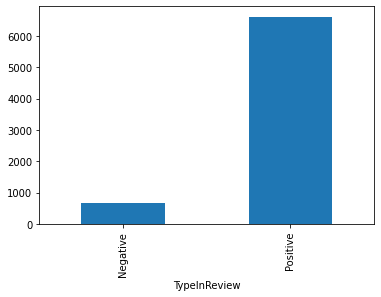

In [ ]:
df.groupby("TypeInReview").rating.count().plot.bar(ylim=0)

In [ ]:
df['rating'] = df['rating'].map(lambda x: x.rstrip(' out of 5 stars')).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7276 entries, 0 to 7275
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    7276 non-null   object 
 1   rating                   7276 non-null   float64
 2   body                     7276 non-null   object 
 3   Subjectivity             7276 non-null   float64
 4   Polarity                 7276 non-null   float64
 5   TypeInReview             7276 non-null   object 
 6   Type in Opinion or Fact  7276 non-null   object 
dtypes: float64(3), object(4)
memory usage: 398.0+ KB


In [ ]:
conditions = [(df['rating'] <4.0),(df['rating'] >= 4.0)]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['TypeInReview'] = np.select(conditions, values)

In [ ]:
def get_convert(types):
  if(types) == 'Positive':
    return 1
  elif (types) == 'Negative':
    return 0 
df['Sentiment'] = df['TypeInReview'].apply(get_convert)
df

,title,rating,body,Subjectivity,Polarity,TypeInReview,Type in Opinion or Fact,Sentiment
0,PARENTS BEWARE: This could be useless to you too!,5.0,gave it 5 stars because there is nothing wrong...,0.570833,0.037500,Positive,Fact,1
1,Useless - not really portable.,1.0,i strongly recommend against buying the switch...,0.555556,0.088889,Negative,Fact,0
2,List of Changes Compared to (Regular) Nintendo...,3.0,basically a budget friendly nintendo switch th...,0.422829,0.229434,Negative,Opinion,0
3,The better Nintendo Switch for handheld mode,5.0,for those who use will use the switch exclusiv...,0.558763,0.233439,Positive,Fact,1
4,"Excellent hardware, horrible OS for sharing",2.0,do not buy this as a second switch especially ...,0.403869,0.130208,Negative,Opinion,0
...,...,...,...,...,...,...,...,...
7271,Awesome!,5.0,awesome love it i m a woman and this is the pe...,0.681250,0.535937,Positive,Fact,1
7272,Perfect and exactly what I wanted,5.0,i wanted something to take to work with me to ...,0.288889,-0.155556,Positive,Opinion,1
7273,Perfect!,5.0,shipped and arrived quickly,0.500000,0.333333,Positive,Fact,1
7274,Very much wow,5.0,yuh this thing is cool yerrr errrbody wanna th...,0.416667,0.283333,Positive,Opinion,1


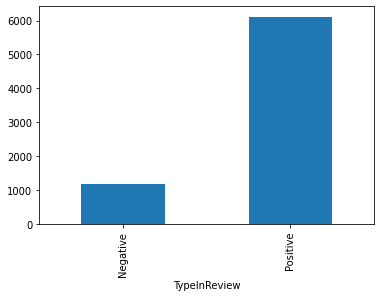

In [ ]:
df.groupby("TypeInReview").rating.count().plot.bar(ylim=0)

In [ ]:
df = df.drop(columns = ['title','rating','Subjectivity','Polarity','TypeInReview','Type in Opinion or Fact'])
df

,body,Sentiment
0,gave it 5 stars because there is nothing wrong...,1
1,i strongly recommend against buying the switch...,0
2,basically a budget friendly nintendo switch th...,0
3,for those who use will use the switch exclusiv...,1
4,do not buy this as a second switch especially ...,0
...,...,...
7271,awesome love it i m a woman and this is the pe...,1
7272,i wanted something to take to work with me to ...,1
7273,shipped and arrived quickly,1
7274,yuh this thing is cool yerrr errrbody wanna th...,1


In [ ]:
 df.to_csv(f'nintendo_switch_review_amazon.csv') 
 files.download(f'nintendo_switch_review_amazon.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training with Bert

In [ ]:
!pip install transformers==3.1.0

     |████████████████████████████████| 884 kB 24.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.5 MB/s 
     |████████████████████████████████| 3.0 MB 58.3 MB/s 
     |████████████████████████████████| 895 kB 40.6 MB/s 


In [ ]:
!pip install tensorflow #==2.1.0

     |████████████████████████████████| 462 kB 21.0 MB/s 


In [ ]:
!pip install tensorflow-addons==0.8.2

     |████████████████████████████████| 1.0 MB 23.6 MB/s 


In [ ]:
!pip install keras==2.8.0
#2.3.1

     |████████████████████████████████| 1.4 MB 16.8 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
!pip3 install PyJWT

In [ ]:
from tensorflow.python.client import device_lib

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
# from tensorflow import keras 
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

In [ ]:
# All layers needed in BERT
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, SpatialDropout1D, Conv1D, Bidirectional, LSTM , Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.optimizers import LAMB, AdamW
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
# Load Huggingface transformers
# from transformers import TFBertModel, BertConfig, BertTokenizerFast, TFAutoModel
from transformers import TFBertModel
from transformers import BertConfig
from transformers import BertTokenizerFast
from transformers import TFAutoModel

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel, RobertaConfig  

In [ ]:

#Split the df into test df
X_train, X_test, y_train, y_test = train_test_split(df.index.values, 
                                                  df.Sentiment.values, 
                                                  test_size=0.1, 
                                                  random_state=42, 
                                                  stratify=df.Sentiment)

#Split the df into val df
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=y_train)

df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[X_test, 'data_type'] = 'test'

df = df.dropna()

# Remove duplicates 
train_set = df[df['data_type'] == 'train'].drop_duplicates(ignore_index=True)
val_set = df[df['data_type'] == 'val'].drop_duplicates(ignore_index=True)
test_set = df[df['data_type'] == 'test'].drop_duplicates(ignore_index=True)

df = pd.concat([train_set, val_set, test_set], ignore_index=True)
df = df.sample(frac=1, random_state=1).reset_index(drop=True)
df

,body,Sentiment,data_type
0,perfect gift,1,val
1,great system it feels so light in your hand co...,1,train
2,much lighter than i had anticipated but is ver...,0,val
3,my son is highly elated,1,train
4,great product exactly as described was a gift ...,1,test
...,...,...,...
4706,we got this for my 11 year old for christmas h...,1,train
4707,works great good price,1,train
4708,love my lite play it more then the og switch l...,1,train
4709,my son loves it glad i bought it,1,val


# Load data from csv after pre-processing

Load data if data in archive else don't need to run here!

In [ ]:
#!unzip "" -d ""

In [ ]:
#df = pd.read_csv('')

In [ ]:
#df.groupby("Sentiment").Sentiment.count().plot.bar(ylim=0)

Choose the model and categorize the data

In [ ]:
# Run if using normal Bert
# Name of the BERT model to use
model_name = 'bert-base-cased'

# Max length of tokens
length = len(df.body)
dff = [len(i.split(" ")) for i in df.body[:length]]
max_length = max(dff)+3

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Transformers BERT model
transformer_bert_model = TFBertModel.from_pretrained(model_name, config = config)

In [ ]:
# Run if using RoBert model
model_name = 'roberta-base'

# Max length of tokens
max_length = 40

# Load transformers config and set output_hidden_states to False
config = RobertaConfig.from_pretrained(model_name)
config.output_hidden_states = False

# Load Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

# Load the Roberta model
transformer_roberta_model = TFRobertaModel.from_pretrained(model_name, config = config)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def map_func(input_ids, masks, labels):
    # convert three-item tuple into a two-item tuple 
    return {'input_ids': input_ids, 'attention_mask': masks}, labels
batch_size = 40

In [ ]:
y_senti = to_categorical(df[df.data_type=='train'].Sentiment)

# Tokenize 
x = tokenizer(
    text=df[df.data_type=='train'].body.to_list(),
    #text=df.body.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

train = tf.data.Dataset.from_tensor_slices((x['input_ids'], x['attention_mask'], y_senti))
train = train.map(map_func)
# shuffle and batch - dropping any remaining samples that don't cleanly
train = train.shuffle(100).batch(batch_size, drop_remainder=True)

train.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(40, 40), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(40, 40), dtype=tf.int32, name=None)}, TensorSpec(shape=(40, 2), dtype=tf.float32, name=None))>

In [ ]:
y_senti = to_categorical(df[df.data_type=='val'].Sentiment)

# Tokenize
x = tokenizer(
    text=df[df.data_type=='val'].body.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

val = tf.data.Dataset.from_tensor_slices((x['input_ids'], x['attention_mask'], y_senti))
val = val.map(map_func)
# shuffle and batch - dropping any remaining samples that don't cleanly
val = val.shuffle(100).batch(batch_size, drop_remainder=True)
val.take(1)

<TakeDataset element_spec=({'input_ids': TensorSpec(shape=(40, 40), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(40, 40), dtype=tf.int32, name=None)}, TensorSpec(shape=(40, 2), dtype=tf.float32, name=None))>

# Model Learning


In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Bert_in CNN

In [ ]:
# Build model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

bert = TFAutoModel.from_pretrained('bert-base-cased')
embeddings = bert.bert(inputs)[1]

# Convert bert embeddings
output = Flatten()(embeddings)
output = Dense(256, activation='relu')(output)
output = Dense(128, activation='relu')(output)

output = Dense(2, activation='softmax', name='outputs')(output)

model = Model(inputs=inputs, outputs=output)

# The model
model.summary()

Bert-muticlass

In [ ]:
# Choose upper than no need to choose this to run!
# Load the MainLayer
bert = transformer_bert_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)

# Then build your model output
Sentiments = Dense(units=len(df[df.data_type=='train'].Sentiment.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='Sentiment')(pooled_output)
outputs = {'Sentiment': Sentiments}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiClass')

# Take a look at the model
model.summary()



RoBert


In [ ]:
# Choose upper than no need to choose this to run!
# Load the MainLayer
roberta = transformer_roberta_model.layers[0]

# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}

# Load the Transformers RoBERTa model as a layer in a Keras model
roberta_model = roberta(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(roberta_model, training=False)

# Then build your model output
Sentiments = Dense(units=len(df[df.data_type=='train'].Sentiment.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='Sentiment')(pooled_output)
outputs = {'Sentiment': Sentiments}

# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='RoBERTa_MultiClass')

# Take a look at the model
model.summary()

Model: "RoBERTa_MultiClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_ids (InputLayer)      [(None, 40)]              0         
                                                                 
 roberta (TFRobertaMainLayer  ((None, 40, 768),        124645632 
 )                            (None, 768))                       
                                                                 
 pooled_output (Dropout)     (None, 768)               0         
                                                                 
 Sentiment (Dense)           (None, 2)                 1538      
                                                                 
Total params: 124,647,170
Trainable params: 124,647,170
Non-trainable params: 0
_________________________________________________________________


# Run model

In [ ]:
#step = tf.Variable(0, trainable=False)
#schedule = tf.optimizers.schedules.PiecewiseConstantDecay(
#    [10000, 15000], [1e-0, 1e-1, 1e-2])
# lr and wd can be a function or a tensor
#lr = 1e-1 * schedule(step)
#wd = lambda: 1e-4 * schedule(step)

#optimizer = AdamW(learning_rate=lr, weight_decay=wd)

#optimizer = AdamW(learning_rate=1e-5, weight_decay=1e-6)

optimizer = tf.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08,decay=0.01,clipnorm=1.0)
loss = CategoricalCrossentropy(from_logits = True)
acc = CategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])


In [ ]:
# Fit the model
history = model.fit(
    train,
    validation_data=val,
    epochs=2,
    verbose =1)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['attention_mask'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


79/79 [==============================] - 1279s 16s/step - loss: 0.3379 - accuracy: 0.8706 - val_loss: 0.1738 - val_accuracy: 0.9333
Epoch 2/2
79/79 [==============================] - 1214s 15s/step - loss: 0.1740 - accuracy: 0.9361 - val_loss: 0.1671 - val_accuracy: 0.9286


In [ ]:
model.save_weights('./sentiment-analysis-on-Amazone-reviews/bert_weights.h5')

In [ ]:
model.load_weights('./sentiment-analysis-on-Amazone-reviews/bert_weights.h5')

In [ ]:
def map_func(input_ids, masks):
    return {'input_ids': input_ids, 'attention_mask': masks}

# Tokenize the input 
x = tokenizer(
    text=df[df.data_type=='test'].body.to_list(),
    #text=df.body.to_list(),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

test = tf.data.Dataset.from_tensor_slices((x['input_ids'], x['attention_mask']))
test = test.map(map_func)
test = test.batch(32)

In [ ]:
y_test = df[df.data_type=='test'].Sentiment
y_pred = model.predict(test)

In [ ]:
y_pred['Sentiment']

array([[-3.1228447 ,  2.797456  ],
       [-2.9782405 ,  2.5636857 ],
       [ 0.63405126, -1.023181  ],
       ...,
       [-0.9731869 ,  0.6482436 ],
       [-1.0308841 ,  0.67821145],
       [-3.1170895 ,  2.7522223 ]], dtype=float32)

In [ ]:
y_pred_max=[np.argmax(i) for i in y_pred['Sentiment']]

In [ ]:
y_val_actual_max=[np.argmax(i) for i in y_val]

In [ ]:
target_categories = ["0","1"]

RoBERT Train Accuracy Score :      94% 
RoERT Validation Accuracy Score : 93% 
RoBERT Test Accuracy Score  :      92% 

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       112
           1       0.92      0.99      0.95       548

    accuracy                           0.92       660
   macro avg       0.93      0.78      0.83       660
weighted avg       0.92      0.92      0.91       660



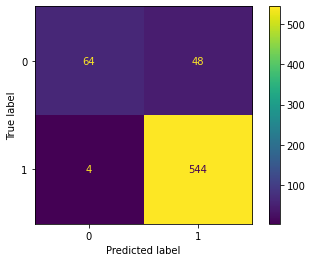

In [ ]:
# Plot Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

print("RoBERT Train Accuracy Score :      {:.0f}% ".format(history.history['accuracy'][-1]*100))
print("RoBERT Validation Accuracy Score : {:.0f}% ".format(history.history['val_accuracy'][-1]*100))
print("RoBERT Test Accuracy Score  :      {:.0f}% ".format(accuracy_score(y_test, y_pred_max)*100))
print()
cm = confusion_matrix(y_test, y_pred_max, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# Get Classification Report for Validation Data
print(classification_report(y_test, y_pred_max, target_names = target_categories))



BERT Train Accuracy Score :      94% 
BERT Validation Accuracy Score : 93% 
BERT Test Accuracy Score  :      92% 

              precision    recall  f1-score   support

           0       0.94      0.57      0.71       112
           1       0.92      0.99      0.95       548

    accuracy                           0.92       660
   macro avg       0.93      0.78      0.83       660
weighted avg       0.92      0.92      0.91       660



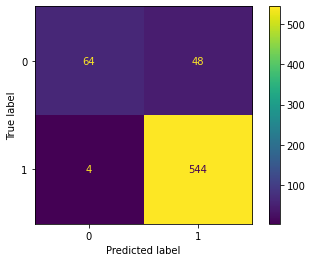

In [ ]:
# Plot Confusion Matrix for Test Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

print("BERT Train Accuracy Score :      {:.0f}% ".format(history.history['accuracy'][-1]*100))
print("BERT Validation Accuracy Score : {:.0f}% ".format(history.history['val_accuracy'][-1]*100))
print("BERT Test Accuracy Score  :      {:.0f}% ".format(accuracy_score(y_test, y_pred)*100))
print()
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# Get Classification Report for Validation Data
print(classification_report(y_test, y_pred, target_names = target_categories))



In [ ]:
def prep_data(text):
    tokens = tokenizer(text,max_length=max_length,truncation=True,
                      padding='max_length',add_special_tokens=True,
                      return_tensors='tf')
    return {"input_ids": tokens['input_ids'],
           "attention_mask": tokens["attention_mask"]}


In [ ]:
probs = model.predict(prep_data('this product was amazing'))
np.argmax(probs)

0

# TF-IDF


Library for TF-IDF using for SVM (SGD classification)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [ ]:
X_train = train_set.body.values
Y_train = train_set.Sentiment.values
X_test = test_set.body.values
Y_test = test_set.Sentiment.values

In [ ]:
target_categories = ["0","1"]

SVM Train Accuracy Score : 99% 
SVM Test Accuracy Score  : 98% 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       111
           1       0.99      0.99      0.99       549

    accuracy                           0.98       660
   macro avg       0.97      0.97      0.97       660
weighted avg       0.98      0.98      0.98       660



'              precision    recall  f1-score   support\n\n           0       0.95      0.95      0.95       111\n           1       0.99      0.99      0.99       549\n\n    accuracy                           0.98       660\n   macro avg       0.97      0.97      0.97       660\nweighted avg       0.98      0.98      0.98       660\n'

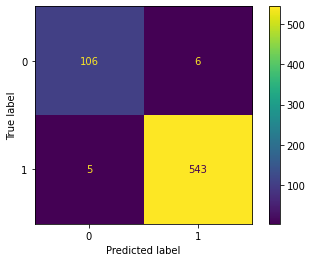

In [ ]:
sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier()),
               ])

sgd.fit(X_train, Y_train)
test_predict = sgd.predict(X_test)

train_accuracy = round(sgd.score(X_train, Y_train)*100)
test_accuracy = round(accuracy_score(test_predict, Y_test)*100)

print("SVM Train Accuracy Score : {}% ".format(train_accuracy))
print("SVM Test Accuracy Score  : {}% ".format(test_accuracy))
print()
print(classification_report(test_predict, Y_test, target_names=target_categories))

class_report = classification_report(test_predict, Y_test, target_names=target_categories)
cm = confusion_matrix(Y_test, test_predict, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
class_report

In [ ]:
probs = model.predict(prep_data('this product was terrible'))
np.argmax(probs)

0

In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
df['Sentiment'] = None

In [ ]:
for i, row in df.iterrows():
    tokens = prep_data(row['body'])
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    df[df.data_type=='test'].at[i,'Sentiment'] = pred

In [ ]:
df.head()


,body,Sentiment,data_type
0,perfect gift,0,val
1,great system it feels so light in your hand compared to the original switch and that pretty turquoise,0,train
2,much lighter than i had anticipated but is very easy to hold for long periods of time unfortunately i encountered issues with the lite within a few days of receiving it experiencing the joystick issue mentioned in other reviews here and elsewhere online the lite itself is a great unit but it is unplayable to the extent i had to purchase a separate controller to use until the nintendo repair centers open back up and accept repair orders hopefully a warranty repair will resolve the issue,0,val
3,my son is highly elated,0,train
4,great product exactly as described was a gift for my husband and he absolutely loves it,0,test
